In [1]:
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy   as np
import matplotlib.cm as cm
from scipy import stats
from ArcticTools import map
from mpl_toolkits.basemap import Basemap
import seaborn as sns
import glob
sns.set_style("whitegrid")
%matplotlib inline

In [2]:
nav_lat= nc.Dataset('/ocean/xiaoxiny/research/data/isobath_factor.nc').variables['nav_lat'][:]
nav_lon= nc.Dataset('/ocean/xiaoxiny/research/data/isobath_factor.nc').variables['nav_lon'][:]
e3t= nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc').variables['e3t_0'][0,:]

In [3]:
nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc').variables.keys()

[u'nav_lon',
 u'nav_lat',
 u'nav_lev',
 u'time_counter',
 u'tmask',
 u'umask',
 u'vmask',
 u'fmask',
 u'tmaskutil',
 u'umaskutil',
 u'vmaskutil',
 u'fmaskutil',
 u'glamt',
 u'glamu',
 u'glamv',
 u'glamf',
 u'gphit',
 u'gphiu',
 u'gphiv',
 u'gphif',
 u'e1t',
 u'e1u',
 u'e1v',
 u'e1f',
 u'e2t',
 u'e2u',
 u'e2v',
 u'e2f',
 u'ff',
 u'mbathy',
 u'e3t',
 u'e3u',
 u'e3v',
 u'e3w',
 u'gdept',
 u'gdepu',
 u'gdepv',
 u'gdepw',
 u'gdept_0',
 u'gdepw_0',
 u'e3t_0',
 u'e3w_0']

In [16]:
dz= nc.Dataset('/ocean/xiaoxiny/research/data/mesh_mask_anha4_201509.nc').variables['gdept_0'][0,:]
dz.shape

(50,)

In [4]:
bathy=nc.Dataset(
    '/ocean/xiaoxiny/research/data/Jasper/ANHA4_bathy_etopo1_gebco1_smoothed_coast_corrected_mar10.nc')
nemolon=bathy.variables['nav_lon'][400:,:]
nemolat=bathy.variables['nav_lat'][400:,:]
bathy=bathy.variables['Bathymetry'][400:,:]

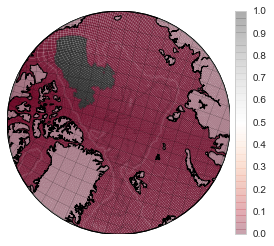

In [5]:
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round="True")
n_lon,n_lat = m(nemolon,nemolat)
m.plot(n_lon[::20,::20],n_lat[::20,::20],n_lon[::20,::20].T,n_lat[::20,::20].T,color='black',linewidth=0.2,alpha=0.7)

# shade coastal/internal ocean
pbathy = np.zeros_like(bathy)

for tempx in range(len(pbathy[0,:])):
   for tempy in range(len(pbathy[:,0])):

    # step 2: using bathy to do the basic calculation
     if bathy[tempy,tempx]>=3000:
        pbathy[tempy,tempx] = 1
     
    # step 1: using imaginary lines to exclude AR from a shallow water region
    # line1 <3000 = nan
     if (35*tempx -8120 > tempy) and bathy[tempy,tempx] < 3000:
                pbathy[tempy,tempx] = np.nan
    # line2 up and < 3000 = 0 
     if (-21/69*tempx+353.04<tempy) and bathy[tempy,tempx] < 3000:
                pbathy[tempy,tempx] = 0                      
    # line3 right hand side = nan           
     if(2.69*tempx -497.16 > tempy):
            pbathy[tempy,tempx] = np.nan
     if (nemolon[tempy,tempx]>=-180) and(nemolon[tempy,tempx]<-170)and bathy[tempy,tempx]<1500:
        pbathy[tempy,tempx] = np.nan  
        
    # step 3: N sea
     if (nemolon[tempy,tempx]<-60) and(nemolon[tempy,tempx]>-100) and nemolat[tempy,tempx]<80:
         pbathy[tempy,tempx] = np.nan  
    
# step 4: remove outside of CB
latind = (nemolon<180)&(nemolon>-100)
pbathy[(bathy < 500)|latind] = np.nan  
latind = (nemolon<-175) & (bathy < 3000)
pbathy[(bathy < 500)|latind] = np.nan 
latind = (nemolon>-115) & (bathy < 3000)
pbathy[latind] = np.nan 

# convert to 1/0
shallow=-(pbathy-1)
deep3 = pbathy
ind = (deep3!=1);deep3[ind]=0
ind = (shallow!=1);shallow[ind]=0

# visualize 
m = Basemap(projection='npstere',boundinglat=70,lon_0=0,resolution='l',round="True")
m.pcolor(n_lon,n_lat, np.ma.masked_invalid(deep3), cmap = 'RdGy',alpha = 0.2)
m.colorbar()
m.contour(n_lon,n_lat,bathy,[1000,3000],alpha=0.1)
m.drawcoastlines()
m.fillcontinents(color = '0.85',alpha=0.5)
plt.show()

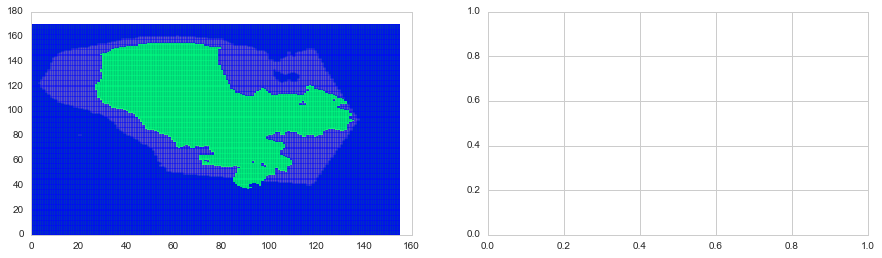

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(15, 4))
axs[0].pcolormesh(deep3[170:340, 145:300], cmap='winter')
axs[0].pcolormesh(shallow[170:340, 145:300], cmap='summer', alpha=0.1)

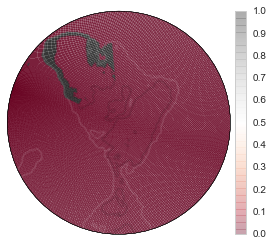

In [19]:
m.pcolor(n_lon,n_lat, np.ma.masked_invalid(shallow), cmap = 'RdGy',alpha = 0.2)
m.colorbar()
m.contour(n_lon,n_lat,bathy,[1000,3000],alpha=0.1)

In [21]:
#save in npy file
#np.save("deep", deep3)
#np.save("shallow", shallow)

In [20]:
# dz
dz[31]-dz[30]

87.151163573011331